<a href="https://colab.research.google.com/github/Rajeeb321123/Machine-learning-Journey/blob/master/15_k_means_clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# K-Means Clustering

## Importing the libraries

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

## Importing the dataset

In [21]:
# Important: This is the real way. We need to include all the feautres including genre and Age
# but we can't visualize them in 2D graph for study purpose only, so we do like the cell below.
dataset = pd.read_csv('Mall_Customers.csv')
# customerId isnot a feature so we excude it by[:, 1:]
X = dataset.iloc[:,1:].values # in unsupervised learning there is no dependent variable so we include last column as well.
X[:3]
# Unsupervised learning so no y and no splitting the data into trainning and test set

array([['Male', 19, 15, 39],
       ['Male', 21, 15, 81],
       ['Female', 20, 16, 6]], dtype=object)

In [22]:
# we choose only two column Annual income and spending score but this is wrong way
# but for plotting them in 2Dj graph we did it here
X = dataset.iloc[:,[3, 4]].values
X[:3]

array([[15, 39],
       [15, 81],
       [16,  6]])

## Using the elbow method to find the optimal number of clusters

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

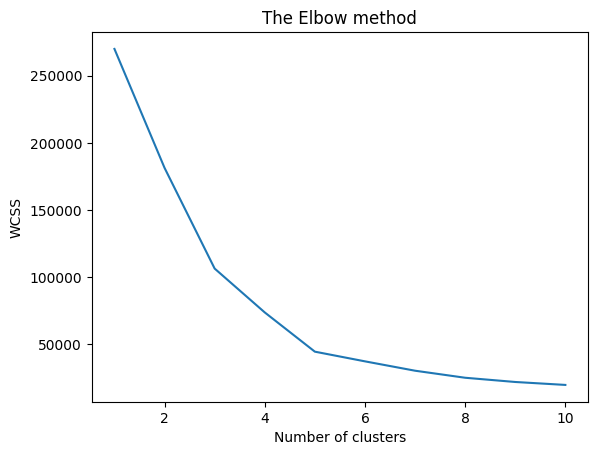

In [23]:
# Running the k-mean algorithm several times, each time different number of clusters.
from sklearn.cluster import KMeans

#for plotting elbow graph
wcss=[]

# for loops with k-means with 10 different number of clusters
for i in range(1,11):
  kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state=42) # K-means++ against random initialization trap
  kmeans.fit(X)
  wcss.append(kmeans.inertia_) # inertia will give wcss value

plt.plot(range(1,11), wcss)
plt.title("The Elbow method")
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()


## Training the K-Means model on the dataset

In [24]:
kmeans = KMeans(n_clusters = 5, init = 'k-means++', random_state=42)
y_kmeans = kmeans.fit_predict(X)
y_kmeans

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


array([2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3,
       2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 0,
       2, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 1, 4, 0, 4, 1, 4, 1, 4,
       0, 4, 1, 4, 1, 4, 1, 4, 1, 4, 0, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4,
       1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4,
       1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4,
       1, 4], dtype=int32)

## Visualising the clusters

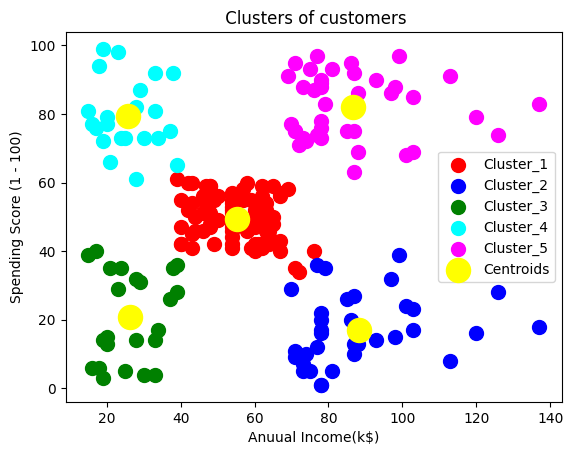

In [31]:
# select all the row where y_kmeans == 0 in column Annual income or ) and ylable is similar for spending score: 1
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 100, c = "red", label = 'Cluster_1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 100, c = "blue", label = 'Cluster_2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 100, c = "green", label = 'Cluster_3')
plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s = 100, c = "cyan", label = 'Cluster_4')
plt.scatter(X[y_kmeans == 4, 0], X[y_kmeans == 4, 1], s = 100, c = "magenta", label = 'Cluster_5')

# for centroid
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s =300, c = 'yellow', label='Centroids'  )
plt.title(' Clusters of customers')
plt.xlabel('Anuual Income(k$)')
plt.ylabel('Spending Score (1 - 100)')
plt.legend()
plt.show()